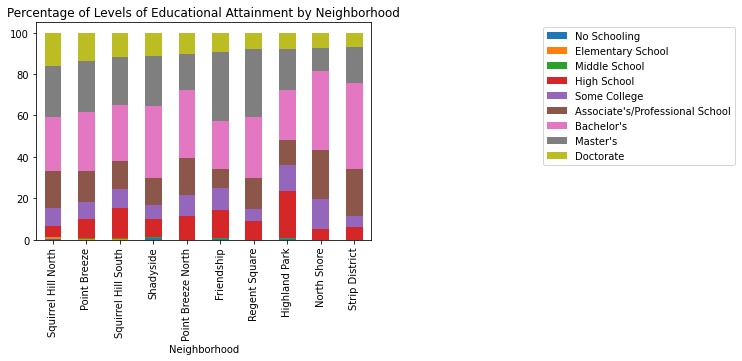

In [1]:
#Courtney's work for the final notebook

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import data from WPRDC
edu_all = pd.read_csv("edu-attainment.csv")
edu_all.head()

#drop all the margin of error columns; we won't be using that for this project
edu = edu_all.drop(columns=['Margin of Error; Total:','Margin of Error; Total: - No schooling completed','Margin of Error; Total: - Nursery school',
                  'Margin of Error; Total: - Kindergarten','Margin of Error; Total: - 1st grade','Margin of Error; Total: - 2nd grade',
                 'Margin of Error; Total: - 3rd grade','Margin of Error; Total: - 4th grade','Margin of Error; Total: - 4th grade',
                 'Margin of Error; Total: - 5th grade','Margin of Error; Total: - 6th grade','Margin of Error; Total: - 7th grade',
                 'Margin of Error; Total: - 8th grade','Margin of Error; Total: - 9th grade','Margin of Error; Total: - 10th grade',
                 'Margin of Error; Total: - 11th grade','Margin of Error; Total: - 12th grade, no diploma','Margin of Error; Total: - Regular high school diploma',
                 'Margin of Error; Total: - GED or alternative credential','Margin of Error; Total: - Some college, less than 1 year',
                 'Margin of Error; Total: - Some college, 1 or more years, no degree',"Margin of Error; Total: - Associate's degree",
                 "Margin of Error; Total: - Bachelor's degree","Margin of Error; Total: - Master's degree",'Margin of Error; Total: - Professional school degree',
                 'Margin of Error; Total: - Doctorate degree'])

percentages = pd.DataFrame(columns=('Neighborhood', 'No Schooling', 'Elementary School', 'Middle School', 'High School', 'Some College', 
                                   "Associate's/Professional School", "Bachelor's", "Master's", "Doctorate"))

#creates new dataframe by combining some of the schooling categories
for row in edu.index:
    neighborhood = edu.loc[row, "Neighborhood"]
    numNS = edu.loc[row, "Estimate; Total: - No schooling completed"]
    numES =  (edu.loc[row, "Estimate; Total: - Nursery school"] + edu.loc[row, "Estimate; Total: - Kindergarten"] + 
           edu.loc[row, "Estimate; Total: - 1st grade"] + edu.loc[row, "Estimate; Total: - 2nd grade"] + 
           edu.loc[row, "Estimate; Total: - 3rd grade"] + edu.loc[row, "Estimate; Total: - 4th grade"] +
           edu.loc[row, "Estimate; Total: - 5th grade"])
    numMS =  (edu.loc[row, "Estimate; Total: - 6th grade"] + edu.loc[row, "Estimate; Total: - 7th grade"] + 
           edu.loc[row, "Estimate; Total: - 8th grade"])
    numHS =  (edu.loc[row, "Estimate; Total: - 9th grade"] + edu.loc[row, "Estimate; Total: - 10th grade"] + 
           edu.loc[row, "Estimate; Total: - 11th grade"] + edu.loc[row, "Estimate; Total: - 12th grade, no diploma"] +
           edu.loc[row, "Estimate; Total: - Regular high school diploma"] + edu.loc[row, "Estimate; Total: - GED or alternative credential"])
    numSC =  (edu.loc[row, "Estimate; Total: - Some college, less than 1 year"] + edu.loc[row, "Estimate; Total: - Some college, 1 or more years, no degree"])
    numAP =  (edu.loc[row, "Estimate; Total: - Professional school degree"] + edu.loc[row, "Estimate; Total: - Associate's degree"])
    numB =  (edu.loc[row, "Estimate; Total: - Bachelor's degree"])
    numM =  (edu.loc[row, "Estimate; Total: - Master's degree"])
    numD =  (edu.loc[row, "Estimate; Total: - Doctorate degree"])
    population = numNS + numES + numMS + numHS + numSC + numAP + numB + numM + numD
    values_to_add = {'Neighborhood':neighborhood,
                     'No Schooling':(100*numNS/population),
                     'Elementary School':(100*numES/population), 
                     'Middle School':(100*numMS/population), 
                     'High School':(100*numHS/population), 
                     'Some College':(100*numSC/population), 
                     "Associate's/Professional School":(100*numAP/population), 
                     "Bachelor's":(100*numB/population), 
                     "Master's":(100*numM/population), 
                     "Doctorate":(100*numD/population)}
    row_to_add = pd.Series(values_to_add)
    percentages = percentages.append(row_to_add, 'neighborhood')
    
#sort the data by highest percentage of doctoral degrees and then show the top 10
sortD = percentages.sort_values('Doctorate', ascending=False)
final_df = sortD.head(10) 
final_df.plot(kind='bar', 
           stacked=True,
           x='Neighborhood', 
           title='Percentage of Levels of Educational Attainment by Neighborhood').legend(bbox_to_anchor=(1.5, 1))

In [2]:
#Tait's work for the final notebook

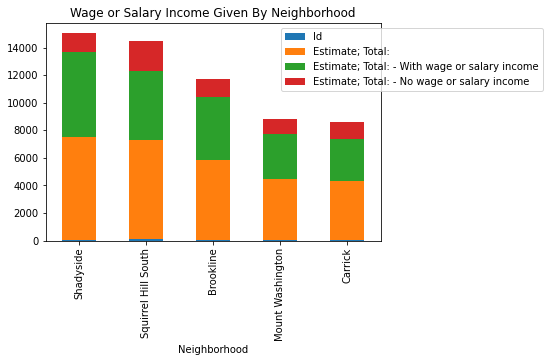

In [4]:
#Karina's work for the final notebook
#import pandas and CVS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
salary_income = pd.read_csv("salary-income.csv")
salary_income.head(10)
#dropped columns that were irrelevant to analysis
salary = salary_income.drop(columns=['Margin of Error; Total:', 'Margin of Error; Total: - With wage or salary income', 'Margin of Error; Total: - No wage or salary income'])
salary_sort = salary.sort_values('Estimate; Total:', ascending=False)
#sorted data of neigbhorhoods by estimate total
salary_small = salary_sort.loc[salary_sort['Estimate; Total:'] > 1000]
salary_small.head(10)
#sorted data of neighborhood by estimate total of no wage or salary income
salary_smaller = salary_small.loc[salary_small['Estimate; Total: - No wage or salary income'] > 1000]
salary_smaller.head(10)
#plot data with bar graph
salary_smaller.plot(kind='bar', stacked=True , x='Neighborhood' , title='Wage or Salary Income Given By Neighborhood').legend(bbox_to_anchor=(1.5, 1))

Conclusion